#EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

pd.set_option('display.float_format', '{:.2f}'.format)

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
data = '/content/drive/MyDrive/Colab Notebooks/dataset/data_franchise.csv'

In [3]:
df = pd.read_csv(data, index_col='no')

#Dictionary

**Keterangan :**
*   **id**  : Franchise Unique key
*   **month_period**: Periode Bulan
*   **revenue** : Total Revenue dalam sebulan
*   **revenue_avg**: Rata-rata revenue per hari dalam satu bulan
*   **max_avg**: Maximum rata-rata revenue per bulan dalam satu tahun
*   **revenue_loss**: max_avg – revenue_avg
*   **loss_perc**: persentase revenue_loss
*   **Province**: Provinsi
*   **regional**: regional
*   **class**: Franchise category


In [4]:
df.head()

,id,month_period,revenue,revenue_avg,max_avg,revenue_loss,loss_perc,Province,regional,class
no,,,,,,,,,,
0,sst0ss0s,2021-01-01,17012788.37,5.487.996.248.387.090,6.989.333.667.741.930,15.013.374.193.548.300,21.480.408.444.141.100,Sumatera Utara,Regional 1,gold
1,sst0ss0s,2021-02-01,16703720.12,5.965.614.328.571.420,6.989.333.667.741.930,10.237.193.391.705.000,1.464.688.034.419.220,Sumatera Utara,Regional 1,gold
2,sst0ss0s,2021-03-01,16907886.5,5.635.962.166.666.660,6.989.333.667.741.930,13.533.715.010.752.600,193.633.837.703.517,Sumatera Utara,Regional 1,gold
3,sst0ss0s,2021-04-01,17612483.94,5.870.827.980.000.000,6.989.333.667.741.930,11.185.056.877.419.300,16.003.037.498.470.000,Sumatera Utara,Regional 1,gold
4,sst0ss0s,2021-05-01,18601047.0,6.000.337.741.935.480,6.989.333.667.741.930,9.889.959.258.064.520,14.150.074.568.209.400,Sumatera Utara,Regional 1,gold




```
data terlihat tidak menunjukkan pola dan terlalu banyak miss yang terkandung, sehingga perlu dilakukan pengecekan terlebih dahulu

- step 1 : melihat rata-rata panjang karakter pada kolom **revenue **
```

In [5]:
#Step 1

df['character']=df['revenue'].apply(len)

In [ ]:
df.head()

,id,month_period,revenue,revenue_avg,max_avg,revenue_loss,loss_perc,Province,regional,class,character
no,,,,,,,,,,,
0,sst0ss0s,2021-01-01,17012788.37,5.487.996.248.387.090,6.989.333.667.741.930,15.013.374.193.548.300,21.480.408.444.141.100,Sumatera Utara,Regional 1,gold,11
1,sst0ss0s,2021-02-01,16703720.12,5.965.614.328.571.420,6.989.333.667.741.930,10.237.193.391.705.000,1.464.688.034.419.220,Sumatera Utara,Regional 1,gold,11
2,sst0ss0s,2021-03-01,16907886.5,5.635.962.166.666.660,6.989.333.667.741.930,13.533.715.010.752.600,193.633.837.703.517,Sumatera Utara,Regional 1,gold,10
3,sst0ss0s,2021-04-01,17612483.94,5.870.827.980.000.000,6.989.333.667.741.930,11.185.056.877.419.300,16.003.037.498.470.000,Sumatera Utara,Regional 1,gold,11
4,sst0ss0s,2021-05-01,18601047.0,6.000.337.741.935.480,6.989.333.667.741.930,9.889.959.258.064.520,14.150.074.568.209.400,Sumatera Utara,Regional 1,gold,10


In [6]:
dis_len=df['character'].value_counts().reset_index()

In [7]:
dis_len

,index,character
0,10,57798
1,11,24040
2,9,8692
3,21,856
4,22,764
5,8,587
6,7,100
7,6,39
8,5,17
9,4,15




```
gambaran panjang karekter pada kolom ['revenue]
```



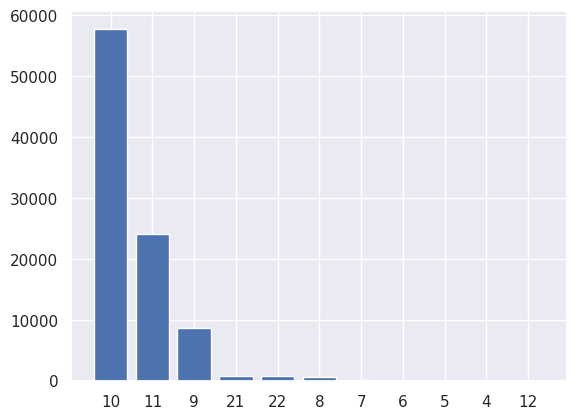

In [8]:
#melihat distribusi secara visual

fig, ax = plt.subplots()
ax.bar(dis_len['index'].astype(str),dis_len['character']);

`berdasarkan data di atas, data terdistribusi ke 10 dan 11, oleh karena itu, panjang 21 dan 22 ditransformasi ke penjang yang sesuai`

`metode di atas diaplikasi ke kolom ['revenue']`

In [9]:
#function untuk meng-conver nilai kolom revenue ke format yang sesuai

def conv(x):
    if isinstance(x, str):
        x = x.strip()
        if len(x) ==21:
            x = x.replace('.', '')
            x = float(x) /1e8
            return round(x,2)
        elif len(x)>=22 :
            x=x.replace('.','')
            x=float(x)/1e9
            return round(x,3)
        else:
            return float(x)
    elif isinstance(x, (int, float)):
        return float(x)
    else:
        return x


In [10]:
df['revenue']=df['revenue'].apply(conv)

In [11]:
df.head()

,id,month_period,revenue,revenue_avg,max_avg,revenue_loss,loss_perc,Province,regional,class,character
no,,,,,,,,,,,
0,sst0ss0s,2021-01-01,17012788.37,5.487.996.248.387.090,6.989.333.667.741.930,15.013.374.193.548.300,21.480.408.444.141.100,Sumatera Utara,Regional 1,gold,11
1,sst0ss0s,2021-02-01,16703720.12,5.965.614.328.571.420,6.989.333.667.741.930,10.237.193.391.705.000,1.464.688.034.419.220,Sumatera Utara,Regional 1,gold,11
2,sst0ss0s,2021-03-01,16907886.50,5.635.962.166.666.660,6.989.333.667.741.930,13.533.715.010.752.600,193.633.837.703.517,Sumatera Utara,Regional 1,gold,10
3,sst0ss0s,2021-04-01,17612483.94,5.870.827.980.000.000,6.989.333.667.741.930,11.185.056.877.419.300,16.003.037.498.470.000,Sumatera Utara,Regional 1,gold,11
4,sst0ss0s,2021-05-01,18601047.00,6.000.337.741.935.480,6.989.333.667.741.930,9.889.959.258.064.520,14.150.074.568.209.400,Sumatera Utara,Regional 1,gold,10


In [12]:
#covert to datetime format

df['month_period']=pd.to_datetime(df['month_period'])

In [13]:
#menampilkan tipe data masing-masing kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92915 entries, 0 to 92957
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            92915 non-null  object        
 1   month_period  92915 non-null  datetime64[ns]
 2   revenue       92915 non-null  float64       
 3   revenue_avg   92915 non-null  object        
 4   max_avg       92915 non-null  object        
 5   revenue_loss  92915 non-null  object        
 6   loss_perc     92915 non-null  object        
 7   Province      92915 non-null  object        
 8   regional      92915 non-null  object        
 9   class         92915 non-null  object        
 10  character     92915 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 8.5+ MB


```
membuat kolom baru ['test_rev_avg'] berdasarkan hasil bagi kolom ['revenue'] dengan jumlah hari  (definisi pada dictionary data yang diberikan)
```

In [14]:
#Menambah kolom ['bulan'] dan kolom ['day'] untuk kalkukasi berdasrkan bulan

df['bulan']  = df['month_period'].dt.strftime('%B %Y')
df['day']    = df['month_period'].dt.day

# Hitung rata-rata revenue per hari untuk setiap bulan

df['tes_rev_avg'] = df['revenue'] / df['month_period'].dt.days_in_month

In [15]:
#me-load data untuk melihat pola yang muncul pada test_rev_avg

df[['id','day','bulan','revenue','revenue_avg','tes_rev_avg']].head()

,id,day,bulan,revenue,revenue_avg,tes_rev_avg
no,,,,,,
0,sst0ss0s,1,January 2021,17012788.37,5.487.996.248.387.090,548799.62
1,sst0ss0s,1,February 2021,16703720.12,5.965.614.328.571.420,596561.43
2,sst0ss0s,1,March 2021,16907886.50,5.635.962.166.666.660,545415.69
3,sst0ss0s,1,April 2021,17612483.94,5.870.827.980.000.000,587082.80
4,sst0ss0s,1,May 2021,18601047.00,6.000.337.741.935.480,600033.77


`pendekatan di atas masih memberikan banyak bias, panjang karekter tertentu memberikan nilai kesamaan nilai antara **revenue_avg** (nilai data set) dan **test_rev_avg** (nilai yang diperoleh berdasarkan hasil bagi antara **revenue** dengan jumlah hari berdarkan bulan)oleh karena itu diperlukan pendekatan lain,  yaitu melihat desimal pada panjang karakter tertentu, dengan demikian, dapat dilakukan transformasi dengan menerapkan fungsi di bawah ⬇`

In [16]:
import re

def format_numbers(x):
    if isinstance(x, str):
      x =x.strip()
      if len(x)==7:
        x = re.sub(r'[^0-9]', '', x)
        return float(f"{str(x)[:4]}.{str(x)[4:]}")
      elif len(x) ==8 :
        x = re.sub(r'[^0-9]', '', x)
        return float(f"{str(x)[:5]}.{str(x)[5:]}")
      elif  len(x)>=9 and len(x) <=11 :
        x = re.sub(r'[^0-9]', '', x)
        return float(f"{str(x)[:6]}.{str(x)[6:]}")
      elif len(x)>11:
        x = re.sub(r'[^0-9]', '', x)
        return float(f"{str(x)[:7]}.{str(x)[7:]}")
      else :
        return None
    else :
      return float(x)

In [17]:
#function format_numbers diimplementasikan ke kolom revenue_avg	(actual), max_avg dan revenue_los

df['revenue_avg']=df['revenue_avg'].apply(format_numbers)
df['max_avg']=df['max_avg'].apply(format_numbers)

In [18]:
'''
membuat kolom baru untuk membandingkan antara nilai actual(nilai data set yang masih cukup berantakan)
dengan nilai berdarkan definisi yang diberikan (mengacu pada dictionary yang diberikan)
'''

df['rev_loss']=df['max_avg']-df['revenue_avg'] #akan dibandingkan dengan kolom ['revenue_loss']
df['loss']=(1-((df['max_avg']-df['rev_loss'])/df['max_avg']))*100 #akan dibandingkan dengan kolom ['loss_perc']

In [74]:
df.columns

Index(['id', 'month_period', 'revenue', 'revenue_avg', 'max_avg',
       'revenue_loss', 'loss_perc', 'Province', 'regional', 'class',
       'character', 'bulan', 'day', 'tes_rev_avg', 'rev_loss', 'loss'],
      dtype='object')

In [19]:

# membentuk dataframe baru untuk untuk melihat perbandingan antara nilai actual dan nilai hasil dari kalkukasi berdasrkan definisi

df[['revenue','revenue_avg','max_avg',
  'revenue_loss','rev_loss','loss_perc','loss']].sample(15)

,revenue,revenue_avg,max_avg,revenue_loss,rev_loss,loss_perc,loss
no,,,,,,,
28218,5297519.78,1765839.93,2702692.89,9.368.529.599.999.990,936852.96,3.466.368.541.619.450,34.66
35745,7752206.97,2500711.93,2671492.06,17.078.013.548.387.000,170780.14,6.392.687.365.927.810,6.39
7418,14715166.75,4905055.58,5388343.55,4.832.879.650.537.630,483287.97,8.969.137.931.051.680,8.97
49129,10249430.26,3416476.75,3527160.22,1.106.834.633.333.330,110683.46,31.380.333.337.376.600,3.14
35283,11996870.35,4284596.55,5562288.92,12.776.923.625.576.000,1277692.36,22.970.622.019.519.000,22.97
1482,1153417.55,1922362.58,2666800.10,744.437.519.892.473,744437.52,27.915.010.164.878.400,27.92
16583,12387560.66,3995987.31,3995987.31,0.0,0.00,0.0,0.00
40876,14233091.84,4591319.95,4618529.38,2.720.942.661.290.340,27209.43,5.891.361.600.986.560,0.59
31739,11576477.35,3734347.53,4641339.56,9.069.920.322.580.640,906992.03,1.954.160.042.915.580,19.54


```
data di atas masih memberikan banyak bias antara nilai actual dengan nilai yang dieproleh berdasrkan hasail perhitungan.
```


In [20]:
#menampilkan kolom ['loss'] yang memiliki nilai minus

df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc','loss']].query('loss<0').head()

,revenue,revenue_avg,max_avg,revenue_loss,rev_loss,loss_perc,loss
no,,,,,,,
303,12365754.68,3988953.12,552434.47,15.353.915.774.193.500,-3436518.65,27.793.189.252.280.900,-622.07
304,12001428.86,4286224.59,552434.47,12.381.201.071.428.500,-3733790.12,2.241.207.191.764.940,-675.88
305,13909618.03,4486973.56,552434.47,1.037.371.141.935.480,-3934539.09,187.781.754.808.943,-712.22
307,16148492.96,5209191.28,552434.47,31.515.342.258.064.400,-4656756.81,57.048.109.720.714,-842.95
308,13945629.88,4648543.29,552434.47,8.758.014.066.666.660,-4096108.82,15.853.489.494.720.800,-741.47


```
hasil di atas memberikan miss informasi, harusnta kolom ['max_avg'] > kolom ['revenue_avg']
```

In [21]:
'''
mengambil indeks untuk mengubah nilai agar menghasilkan nilai yang sesuai dengan nilai actual,
yaitu dengan melihat decimal pada kolom ['max_avg'], nilai kolom ['max_avg'] > kolom ['revenue_avg']
'''

index_minus=df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc','loss']].query('loss<0').index

In [22]:
'''
evaluasi nilai Max_avg agar sesuai data actual, pengacuh pada nilai revenue_loss, Max_avg harus > daripada revenue Avg, (rev_loss) harus bernilai positif,
dikali 10 agar ordo kolom ['revenue'] dan kolom ['max_avg'] bernilai sama
'''

#hanya diterapkan pada index yang memiliki nilai minus pada kolom ['loss']
df['max_avg'].loc[index_minus]=df['max_avg']*10


In [23]:
#melakukan kalkulasi  kembali setelah melakukan update nilai pada kolom ['max_avg']

df['rev_loss'].loc[index_minus]=df['max_avg']-df['revenue_avg']

In [24]:
#melakukan indexing kembali untuk mengecek nilai yang belum sesuai dengan yang diharapkan

index_2=df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc']].loc[index_minus].query('rev_loss	<0').index

In [25]:
df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc','loss']].loc[index_minus].query('rev_loss	<0').sample(10)

,revenue,revenue_avg,max_avg,revenue_loss,rev_loss,loss_perc,loss
no,,,,,,,
24118,3008339.06,9704319.55,2644894.52,167.446.256.516.129,-7059425.03,6.330.923.794.878.930,-3569.08
37997,2086399.34,7451426.21,2420625.23,16.754.826.085.714.200,-5030800.98,6.921.693.568.282.880,-2978.31
31846,2392015.09,7973383.63,2023060.45,12.257.220.866.666.600,-5950323.18,6.058.751.663.434.800,-3841.25
91243,2388188.62,7703834.26,1062547.25,2.921.638.241.935.480,-6641287.01,27.496.548.901.100.400,-7150.35
74431,2705540.89,9662646.04,2181386.10,12.151.214.964.285.700,-7481259.94,557.041.000.870.305,-4329.59
39651,2971900.58,9586776.06,1083037.15,12.435.954.354.838.700,-8503738.91,11.482.481.791.911.400,-8751.75
12084,2607209.38,8690697.93,4161018.68,3.291.948.886.666.660,-4529679.25,7.911.401.365.462.420,-1988.60
54698,7490966.98,2675345.35,426760.90,15.922.636.499.999.900,-2248584.45,3.731.043.893.665.040,-6168.96
5799,9687233.57,3124914.05,382326.90,6.983.549.451.612.890,-2742587.15,1.826.591.184.562.970,-8073.41


In [26]:
#kolom yang dilakukan evaluasi adalah kolom ['revenue_avg'], hal ini dilakukan untuk mengatasi nilai pada kolom ['revenue'] harusnya memeilki orde yang lebih besar dibandingka dengan orde pada kolom ['revenue_avg']

df['revenue_avg'].loc[index_2]=df['revenue_avg']/10

In [27]:
#kalkulasi ulang

df['rev_loss'].loc[index_2]=df['max_avg']-df['revenue_avg']

In [28]:
#cek kembali nilai minus

index_3=df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc']].loc[index_2].query('rev_loss<0').index

In [29]:
df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc','loss']].loc[index_2].query('loss<0').sample(10)

,revenue,revenue_avg,max_avg,revenue_loss,rev_loss,loss_perc,loss
no,,,,,,,
5237,3085372.79,995281.55,2548325.15,15.530.436.048.387.000,1553043.60,6.094.369.883.838.050,-3805.63
5793,8322863.27,268479.46,382326.90,11.384.743.967.741.900,113847.44,2.977.751.230.097.050,-6922.25
22513,17982292.03,580073.94,1105389.05,5.253.151.135.483.870,525315.11,4.752.309.727.949.510,-5147.69
18891,27097079.95,903236.00,1017631.52,11.439.552.166.666.600,114395.52,11.241.350.077.940.400,-8775.86
74134,5991497.13,206603.35,261010.50,5.440.715.068.965.510,54407.15,208.448.130.208,-7815.52
90686,2092185.77,747209.20,1086985.18,3.397.759.764.285.710,339775.98,31.258.565.680.589.200,-6774.14
7011,1787531.92,993073.29,1796064.84,8.029.915.511.111.110,802991.55,4.470.838.319.573.750,-5429.16
21066,2336093.02,753578.39,2827779.20,20.742.008.064.516.100,2074200.81,73.350.875.713.762,-2564.91
65169,8994454.51,290143.69,490692.50,20.054.880.612.903.200,200548.81,40.870.566.827.296.500,-5812.94


In [30]:
#evaluasi (reason : seperti pada langkah sebelumnya)

df['revenue_avg'].loc[index_3]=df['revenue_avg']/10

In [31]:
#kalkulasi kembali
#diterapkan pada kolom ['rev_loss']

df['rev_loss'].loc[index_3]=df['max_avg']-df['revenue_avg']

In [32]:
df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc','loss']].loc[index_3].sample(10)

,revenue,revenue_avg,max_avg,revenue_loss,rev_loss,loss_perc,loss
no,,,,,,,
80198,2087035.24,86959.80,292428.90,20.546.909.833.333.300,205469.10,7.026.292.487.963.170,-29637.08
90783,26381.24,37687.49,56436.70,18.749.214.285.714.200,18749.21,3.322.167.009.359.910,-66678.33
85414,2069737.31,71370.25,142359.40,7.098.914.793.103.440,70989.15,4.986.614.718.173.470,-50033.85
47889,1447977.09,46708.94,166358.20,11.964.926.161.290.300,119649.26,7.192.267.144.805.800,-27977.33
47887,2380795.96,79359.87,166358.20,8.699.833.466.666.660,86998.33,5.229.578.984.785.040,-47604.21
85418,2065731.48,76508.57,142359.40,6.585.082.666.666.660,65850.83,4.625.674.642.255.210,-53643.25
47898,72776969.00,23476.44,166358.20,14.288.175.838.709.600,142881.76,8.588.801.657.333.190,-14011.98
85416,2294752.48,99771.85,142359.40,42.587.553.043.478.200,42587.55,2.991.551.878.097.140,-69984.48
47885,1462763.35,48758.78,166358.20,11.759.942.166.666.600,117599.42,7.069.048.695.325.300,-29209.51




```
kolom ['rev_loss'] yang telah diubah sudah sesuai dengan nilai actualnya
```



\begin{align}
        \%\_Loss= (1- \frac{(df[max\_rev] -df[rev\_loss)]}{df[max\_rev]})\times100\%
    \end{align}

In [33]:
#menerapkan formula untuk menentukan persentasi revenue loss

df['loss']=(1-((df['max_avg']-df['rev_loss'])/df['max_avg']))*100

In [34]:
#evaluasi pada kolom ['loss']

index_4=df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc','loss']].query('loss>50').index

In [35]:
df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc','loss']].query('loss>50').sample(5)

,revenue,revenue_avg,max_avg,revenue_loss,rev_loss,loss_perc,loss
no,,,,,,,
80108,8392761.75,270734.25,2772510.44,651.679.357.142.857,2501776.19,23.505.028.105.510.500,90.24
9984,745457.43,2404701.39,15034966.13,12.630.264.741.935.400,12630264.74,8.400.594.077.526.160,84.01
78383,2094391.00,6756.10,1042310.81,3.667.008.066.666.660,1035554.71,35.181.522.087.388.100,99.35
10556,1438548.01,2397580.02,6694824.67,4.297.244.657.526.880,4297244.66,6.418.756.078.992.490,64.19
89327,1211201.63,1211201.63,2423545.62,1.212.343.988.181.810,1212343.99,5.002.356.791.168.370,50.02


In [36]:
#agak kurang make sense % loss mencapai nilai lebih dari 50%, berdasarkan nilai di atas,kolom  ['max_avg'] memiliki rata-rata 100 kali lebih bsar dari pada nilai pada kolom ['revenue_avg'], maka perlu dievaluasi dengan membagi 10 agar memperkecil nilai perbandingannya

df['max_avg'].loc[index_4]=df['max_avg']/10

In [37]:
#kalkulasi

df['rev_loss'].loc[index_4]=df['max_avg']-df['revenue_avg']

In [38]:
#kalkukasi ulang pada kolom ['loss']

df['loss']=(1-((df['max_avg']-df['rev_loss'])/df['max_avg']))*100

In [39]:
#melakukan pengecekan kembali

index_5=df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc','loss']].query('loss<0').index

In [40]:
#meload kembali data untuk melakukan evaluasi pada kolom ['loss']

df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc','loss']].query('loss<0').sample(10)

,revenue,revenue_avg,max_avg,revenue_loss,rev_loss,loss_perc,loss
no,,,,,,,
29419,6283539.50,2026948.23,463488.61,26.079.379.129.032.200,-1563459.61,56.267.572.381.600.200,-337.32
15192,7062736.97,2278302.25,460027.63,232.197.406.827.957,-1818274.62,5.047.466.518.189.620,-395.25
4116,1733820.50,5592969.35,2679461.39,21.201.644.502.304.100,-2913507.97,7.912.651.630.414.240,-108.73
7938,3361297.32,1084289.46,242931.28,13.450.233.903.225.800,-841358.17,55.366.413.231.444.700,-346.34
83834,1635623.23,654249.29,144999.59,7.957.465.857.777.770,-509249.70,548.792.308.980.434,-351.21
14736,2484204.44,8566222.21,2682738.47,1.826.116.253.503.890,-5883483.73,680.691.118.821.352,-219.31
37854,4431056.82,1582520.29,335133.26,17.688.122.781.105.900,-1247387.04,5.277.937.180.671.480,-372.21
42471,4292965.94,1384827.72,344376.42,2.058.936.460.752.680,-1040451.30,5.978.738.238.574.090,-302.13
5617,1302888.36,4202865.68,912903.37,4.926.168.036.866.350,-3289962.31,5.396.154.939.331.160,-360.38


In [41]:
#melakukan evaluasi kembali pada kolom ['max_avg'] agar nilainya lebih besar dari kolom ['revenue_avg']

df['max_avg'].loc[index_5]=df['max_avg']*10

In [42]:
#evaluasi

df['rev_loss'].loc[index_5]=df['max_avg']-df['revenue_avg']

In [43]:
#kalkulasi ulang untuk terjadi perubahan pada indeks yang dievalusi (index_5)

df['loss']=(1-((df['max_avg']-df['rev_loss'])/df['max_avg']))*100

In [44]:
df[['revenue', 'revenue_avg', 'max_avg','revenue_loss','rev_loss', 'loss_perc','loss']].sample(10)

,revenue,revenue_avg,max_avg,revenue_loss,rev_loss,loss_perc,loss
no,,,,,,,
20066,2686156.48,95934.16,131981.87,36.047.706.000.000.000,36047.71,27.312.620.356.496.500,27.31
63810,3076041.24,128168.38,260348.60,132.180.210.483.871,132180.21,507.704.718.891.252,50.77
25547,9433825.18,3043169.41,3457152.20,4.139.827.903.225.800,413982.79,11.974.676.438.494.600,11.97
75827,9393469.73,3030151.53,3233794.52,2.036.429.908.602.150,203642.99,6.297.338.616.002.310,6.30
17715,16527030.48,5331300.15,7460202.38,2.128.902.229.032.250,2128902.23,28.536.789.211.442.300,28.54
34538,3875812.25,2279889.56,2534134.93,2.542.453.745.098.030,254245.37,10.032.827.027.698.000,10.03
13049,3074819.57,1098149.85,1254152.32,15.600.247.615.207.300,156002.48,1.243.887.790.528.270,12.44
91057,10825628.34,3866295.84,4864706.00,9.984.101.675.115.200,998410.17,20.523.545.859.697.800,20.52
9997,3501013.71,1250362.04,1503496.61,2.531.345.736.175.110,253134.57,16.836.391.345.685.300,16.84


In [45]:
#terlihat data yang diperoleh melalui kalkulasi sudah cukup sesuai pada  nilai actual, sehingga nilai tersebut diaplikasi untuk mengganti nilai-nilai pada kolom ['revenue_loss'] dan kolom ['loss_perc']

df['revenue_loss']=df['rev_loss']
df['loss_perc']=df['loss']

In [46]:
df.columns

Index(['id', 'month_period', 'revenue', 'revenue_avg', 'max_avg',
       'revenue_loss', 'loss_perc', 'Province', 'regional', 'class',
       'character', 'bulan', 'day', 'tes_rev_avg', 'rev_loss', 'loss'],
      dtype='object')

In [47]:
df_1= df.copy()

In [48]:
#mengembalikan ke data awal dengan format yang lebih bersih

dff= df_1[['id', 'month_period', 'revenue', 'revenue_avg',
           'max_avg','revenue_loss', 'loss_perc', 'Province',
           'regional', 'class']]


In [49]:
dff.sample(10)

,id,month_period,revenue,revenue_avg,max_avg,revenue_loss,loss_perc,Province,regional,class
no,,,,,,,,,,
47112,4454s0m,2021-02-01,10932952.13,3904625.76,4248206.75,343580.99,8.09,Jawa Tengah,Regional 4,silver
34494,344tss4,2021-03-01,9650043.95,3112917.40,3717516.83,604599.43,16.26,Banten,Regional 2,silver
77893,64m4m0s,2021-10-01,9033832.62,2914139.55,3273761.00,359621.45,10.98,Kalimantan Tengah,Regional 6,silver
84746,m494t05,2022-05-01,14905981.04,4808380.98,5427685.03,619304.05,11.41,Sulawesi Tengah,Regional 7,silver
52828,4458sss,2021-04-01,12231865.89,407728.86,430920.66,23191.80,5.38,Jawa Tengah,Regional 4,silver
41640,4450ss0,2021-05-01,6867212.10,2215229.71,2346958.18,131728.47,5.61,Jawa Tengah,Regional 4,no_class
3942,s4tsstmm,2021-11-01,11613406.45,3871135.48,4622918.88,751783.40,16.26,Sumatera Utara,Regional 1,silver
10026,s4t93640,2021-02-01,18191772.74,6497061.69,8332519.22,1835457.52,22.03,Riau,Regional 1,no_class
25804,34s64s6,2022-02-01,9652073.04,3447168.94,4383133.70,935964.76,21.35,Jawa Barat,Regional 2,silver


#Visualisasi



```
melakukan pengelompokan provinsi berdasarkan Pulau
```



In [50]:
Jawa = {'Jawa': ['DKI Jakarta', 'Banten', 'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur']}
Sumatra = {'Sumatra': ['Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kepulauan Riau', 'Nanggroe Aceh Darussalam', 'Lampung', 'Sumatera Selatan', 'Bengkulu', 'Kepulauan Bangka Belitung', 'Jambi']}
Kalimantan = {'Kalimantan': ['Kalimantan Selatan', 'Kalimantan Timur', 'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Utara']}
Sulawesi = {'Sulawesi': ['Sulawesi Selatan', 'Sulawesi Utara', 'Sulawesi Tenggara', 'Sulawesi Tengah', 'Gorontalo', 'Sulawesi Barat']}
Papua = {'Papua': ['Papua Barat', 'Papua']}
Maluku = {'Maluku': ['Maluku', 'Maluku Utara']}
Nusa_Tenggara = {'Nusa_Tenggara': ['Nusa Tenggara Barat', 'Nusa Tenggara Timur']}
Bali = {'Bali': ['Bali']}

provinsi = [Jawa, Sumatra, Kalimantan, Sulawesi, Papua, Maluku, Nusa_Tenggara, Bali]

for prov in provinsi:
    key = list(prov.keys())[0]
    value = list(prov.values())[0]
    print(f'Anggota {key} adalah = {len(value)}')

total_provinsi = sum(len(list(prov.values())[0]) for prov in provinsi)
print(f'Total provinsi keseluruhan adalah {total_provinsi}')



Anggota Jawa adalah = 6
Anggota Sumatra adalah = 10
Anggota Kalimantan adalah = 5
Anggota Sulawesi adalah = 6
Anggota Papua adalah = 2
Anggota Maluku adalah = 2
Anggota Nusa_Tenggara adalah = 2
Anggota Bali adalah = 1
Total provinsi keseluruhan adalah 34


`menambah kolom baru berdasarkan Pulau`

In [51]:
pulau_map = {}
for pulau_dict in provinsi:
    pulau_name = list(pulau_dict.keys())[0]
    provinsi_list = pulau_dict[pulau_name]
    for provinsi_name in provinsi_list:
        pulau_map[provinsi_name] = pulau_name


# Membuat kolom baru 'Pulau' berdasarkan peta provinsi ke pulau

dff['Pulau'] = dff['Province'].map(pulau_map)

In [52]:
dff.sample(5)

,id,month_period,revenue,revenue_avg,max_avg,revenue_loss,loss_perc,Province,regional,class,Pulau
no,,,,,,,,,,,
5388,s4tt83ts,2022-04-01,5592748.24,1864249.41,2469220.75,604971.33,24.50,Sumatera Utara,Regional 1,silver,Sumatra
82819,m49s9mm,2022-01-01,11470603.62,3700194.72,4689105.07,988910.35,21.09,Sulawesi Selatan,Regional 7,silver,Sulawesi
3840,s4tsstss,2022-05-01,11335382.21,3656574.91,4316089.08,659514.17,15.28,Sumatera Utara,Regional 1,silver,Sumatra
44568,445tsts,2021-02-01,2228967.88,7960599.57,28048721.63,20088122.06,71.62,Jawa Tengah,Regional 4,silver,Jawa
86591,m496t08,2021-03-01,5441191.95,1755223.21,2109590.27,354367.06,16.80,Gorontalo,Regional 7,silver,Sulawesi


In [120]:
# dff.to_csv('Cleaned_Franchise.csv')

In [53]:
index_out=dff.query('loss_perc>70').index

In [54]:
#dari langkah-langkah yang telah dilakukan ternyata masih menyisahkan problem pada data yang memiliki loss_per di atas 70

dff.query('loss_perc>70').sample(5)

,id,month_period,revenue,revenue_avg,max_avg,revenue_loss,loss_perc,Province,regional,class,Pulau
no,,,,,,,,,,,
25530,34s63t0,2022-01-01,73135710.00,365678.55,1326851.79,961173.24,72.44,Jawa Barat,Regional 2,no_class,Jawa
8902,s4t8368s,2021-01-01,5969128.89,1925525.45,6871390.04,4945864.59,71.98,Riau,Regional 1,silver,Sumatra
15395,t435348,2021-12-01,3950996.97,1274515.15,4285131.40,3010616.25,70.26,Lampung,Regional 1,silver,Sumatra
86859,839mm0t,2022-05-01,56662067.00,283310.34,1900365.56,1617055.22,85.09,Maluku Utara,Regional 7,silver,Maluku
77502,64m4s0t,2022-01-01,351290.62,1351117.77,13483593.68,12132475.91,89.98,Kalimantan Tengah,Regional 6,silver,Kalimantan


In [55]:
miss=len(dff.query('loss_perc>70'))/len(df)*100

print(f'Persentasi data yang memiliki loss_perc lebih dari 70% adalah sebesar :{miss:.2f} %')

Persentasi data yang memiliki loss_perc lebih dari 70% adalah sebesar :3.30 %




```
dengan alasan praktis, data di atas diexclude dari perhitungan.
```



In [56]:
final = dff.loc[~dff.index.isin(index_out)]

#Nomor 1

1. Tentukan rata-rata revenue Pulau Jawa-Bali di bulan Januari

In [58]:
selected=final.loc[dff['Pulau'].isin(['Jawa', 'Bali']) & (final['month_period'].dt.month == 1)]
selected.sample(10)

,id,month_period,revenue,revenue_avg,max_avg,revenue_loss,loss_perc,Province,regional,class,Pulau
no,,,,,,,,,,,
72924,548tt04,2021-01-01,2831456.02,9133729.10,13139234.17,4005505.07,30.49,Bali,Regional 5,silver,Bali
57835,546ss08,2022-01-01,6438921.91,2077071.58,2188835.63,111764.05,5.11,Jawa Timur,Regional 5,silver,Jawa
33166,344stts,2022-01-01,9532185.88,3074898.67,3501232.19,426333.52,12.18,Jawa Barat,Regional 3,silver,Jawa
32575,344sss4,2022-01-01,5073780.51,1636703.39,2216503.17,579799.78,26.16,Jawa Barat,Regional 3,silver,Jawa
31837,34405s4,2022-01-01,11185308.38,3608163.99,4181588.70,573424.71,13.71,Jawa Barat,Regional 3,silver,Jawa
47696,4455ss5,2022-01-01,6918112.44,2231649.17,2383845.94,152196.77,6.38,DI Yogyakarta,Regional 4,silver,Jawa
48038,445550t,2022-01-01,7426746.29,2395724.61,2484875.23,89150.62,3.59,DI Yogyakarta,Regional 4,silver,Jawa
23862,34s5406,2021-01-01,7815768.37,2521215.60,3005427.95,484212.35,16.11,Banten,Regional 2,silver,Jawa
25337,34s6306,2022-01-01,5355302.46,1727516.92,1727516.92,0.00,0.00,Jawa Barat,Regional 2,silver,Jawa


In [59]:
jan=selected.groupby('month_period')['revenue'].mean().to_frame()

jan_dic = jan.to_dict()['revenue']

In [60]:
jan_dic

{Timestamp('2021-01-01 00:00:00'): 8847322.950544309,
 Timestamp('2022-01-01 00:00:00'): 10094207.924859198}

In [61]:
for k,v in jan_dic.items():
  print(f'Besar revenue rata-rata di pulau Jawa dan Bali pada Januari tahun {k.year} sebesar :{v:.3f}\n')
print(f'terdapat peningkatan sebesar {((10094207.925 - 8847322.951) / 8847322.951) * 100:.2f}%')


Besar revenue rata-rata di pulau Jawa dan Bali pada Januari tahun 2021 sebesar :8847322.951

Besar revenue rata-rata di pulau Jawa dan Bali pada Januari tahun 2022 sebesar :10094207.925

terdapat peningkatan sebesar 14.09%


#No 2
Tentukan 10 Provinsi yang memiliki pertumbuhan revenue tertinggi di **tahun 2021** dan sertakan visualisasinya

In [62]:
final['year']=final['month_period'].dt.year

In [161]:
final.columns

Index(['id', 'month_period', 'revenue', 'revenue_avg', 'max_avg',
       'revenue_loss', 'loss_perc', 'Province', 'regional', 'class', 'Pulau',
       'year'],
      dtype='object')

In [63]:
result=final.groupby(['Province','year'])['revenue'].sum().unstack()

In [64]:
result.columns = [f'Year_{col}' for col in result.columns]
result_province=result.reset_index()

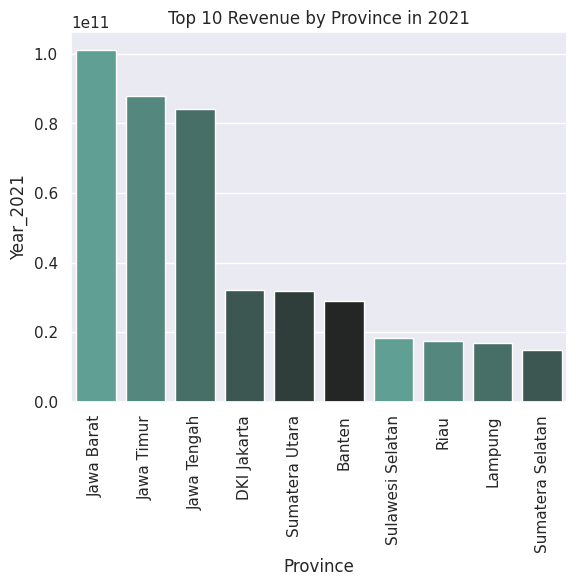

In [73]:
rna=sns.color_palette("dark:#5A9_r")


result_2021_top10 = result_province.sort_values(by='Year_2021', ascending=False).head(10)


sns.barplot(x='Province', y='Year_2021', data=result_2021_top10, palette=rna)

plt.title('Top 10 Revenue by Province in 2021')
plt.xticks(rotation=90)

plt.show()

In [74]:
result_2021_top10[['Province','Year_2021']]

,Province,Year_2021
7,Jawa Barat,101240793236.29
9,Jawa Timur,87839196101.93
8,Jawa Tengah,84215528380.73
4,DKI Jakarta,32034252704.03
33,Sumatera Utara,31756699322.03
1,Banten,28967409629.04
27,Sulawesi Selatan,18369091978.17
25,Riau,17561454104.92
17,Lampung,16831196434.28
32,Sumatera Selatan,14896715223.75


**10 Province dengan revenue terbanyak, 50% dari pulau Jawa, 40% dari Sumatra dan 10% dari Sulawesi. **

In [75]:
result_2021_top10['growth']=((result_2021_top10['Year_2022']-result_2021_top10['Year_2021'])/result_2021_top10['Year_2021'])*100

In [76]:
result_2021_top10

,Province,Year_2021,Year_2022,growth
7,Jawa Barat,101240793236.29,46808587800.59,-53.77
9,Jawa Timur,87839196101.93,40701066242.65,-53.66
8,Jawa Tengah,84215528380.73,37401514852.68,-55.59
4,DKI Jakarta,32034252704.03,15814591545.02,-50.63
33,Sumatera Utara,31756699322.03,16330380058.51,-48.58
1,Banten,28967409629.04,12531434107.66,-56.74
27,Sulawesi Selatan,18369091978.17,8776235262.55,-52.22
25,Riau,17561454104.92,8089568374.56,-53.94
17,Lampung,16831196434.28,7235050752.92,-57.01
32,Sumatera Selatan,14896715223.75,7394553252.42,-50.36


In [77]:
print('Rata-rata ke-10 province mengalami {} {:.2f}'.format("pertumbuhan" if result_2021_top10['growth'].mean() > 0 else "penurunan", result_2021_top10['growth'].mean()))


Rata-rata ke-10 province mengalami penurunan -53.25


In [78]:
result_province['growth']=((result_province['Year_2022']-result_province['Year_2021'])/result_province['Year_2021'])*100

#No 3
Tuliskan hasil dari ekplorasi data tersebut dan sertakan visualisasinya

* dari ke-10 Province yang mencatat perolehan terbaik sepanjang tahun 2021, sayanganya pada tahun berikutnya mengalami penurunan sangat  dalam dengan rata-rata **penurunan sebesar 53%**

In [93]:
aw = df_1.loc[df_1['month_period'].dt.year == 2022, 'month_period'].min().date()
ak = df_1.loc[df_1['month_period'].dt.year == 2022, 'month_period'].max().date()

print(f'data record pada tahun 2022 antara {aw} s.d {ak}')


data record pada tahun 2022 antara 2022-01-01 s.d 2022-06-01


berdasarkan informasi di atas, komparasi yang dilakukan agak kurang tepat, sehingga diperlukan pendekatan lain, yaitu hanya mengambil bulan Januari-Juni

In [104]:
final['month']=final['month_period'].dt.month

In [105]:
to_growth=final.query('month<=6')

In [106]:
hasil=to_growth.groupby(['Province','year'])['revenue'].sum().unstack()

In [107]:
hasil

year,2021,2022
Province,,
Bali,5458039462.44,6629394100.86
Banten,13830229875.69,12531434107.66
Bengkulu,1946609070.01,1401785140.40
DI Yogyakarta,5300095551.38,5471606725.78
DKI Jakarta,14903746493.81,15814591545.02
Gorontalo,1262108804.00,1253102089.23
Jambi,3232784837.92,3717094752.55
Jawa Barat,48664704086.92,46808587800.59
Jawa Tengah,40313213789.73,37401514852.68


In [108]:
hasil.columns = [f'Year_{col}' for col in hasil.columns]
hasil_province=hasil.reset_index()

In [109]:
hasil_province['growth']=((hasil_province['Year_2022']-hasil_province['Year_2021'])/hasil_province['Year_2021'])*100

In [111]:
hasil_province

,Province,Year_2021,Year_2022,growth
0,Bali,5458039462.44,6629394100.86,21.46
1,Banten,13830229875.69,12531434107.66,-9.39
2,Bengkulu,1946609070.01,1401785140.40,-27.99
3,DI Yogyakarta,5300095551.38,5471606725.78,3.24
4,DKI Jakarta,14903746493.81,15814591545.02,6.11
5,Gorontalo,1262108804.00,1253102089.23,-0.71
6,Jambi,3232784837.92,3717094752.55,14.98
7,Jawa Barat,48664704086.92,46808587800.59,-3.81
8,Jawa Tengah,40313213789.73,37401514852.68,-7.22
9,Jawa Timur,42194695673.29,40701066242.65,-3.54


In [118]:
#sort value
hasil_province.sort_values(by='growth', ascending=False)

,Province,Year_2021,Year_2022,growth
16,Kepulauan Riau,1357217668.31,1972367306.61,45.32
18,Maluku,578052411.50,821139631.69,42.05
19,Maluku Utara,361074190.46,457699127.95,26.76
0,Bali,5458039462.44,6629394100.86,21.46
6,Jambi,3232784837.92,3717094752.55,14.98
23,Papua,1086689250.58,1215698042.06,11.87
33,Sumatera Utara,15191942341.93,16330380058.51,7.49
4,DKI Jakarta,14903746493.81,15814591545.02,6.11
28,Sulawesi Tengah,2596504384.77,2704402727.80,4.16
27,Sulawesi Selatan,8480149150.68,8776235262.55,3.49


**Summary : **

Province dengan pertumbuhan 3 besar tertinggi adalah
1.   Kepulauan Riau (+45.32%)
2.   Maluku (+42.05%)
3.   Maluku Utara (+26.76%)

Province dengan Penurunan paling dalam
1.   Bengkulu  (-27,99%)
2.   NTT (-21.13%)
3.   NTB(-20.00%)
